# Constraint plots

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import norm

sns.set_context("talk")

## Load data

In [2]:
z_dist = pd.read_csv("../outputs/expected_variants_all_regions_stats.tsv", sep="\t")

## Nonsense Z score by region

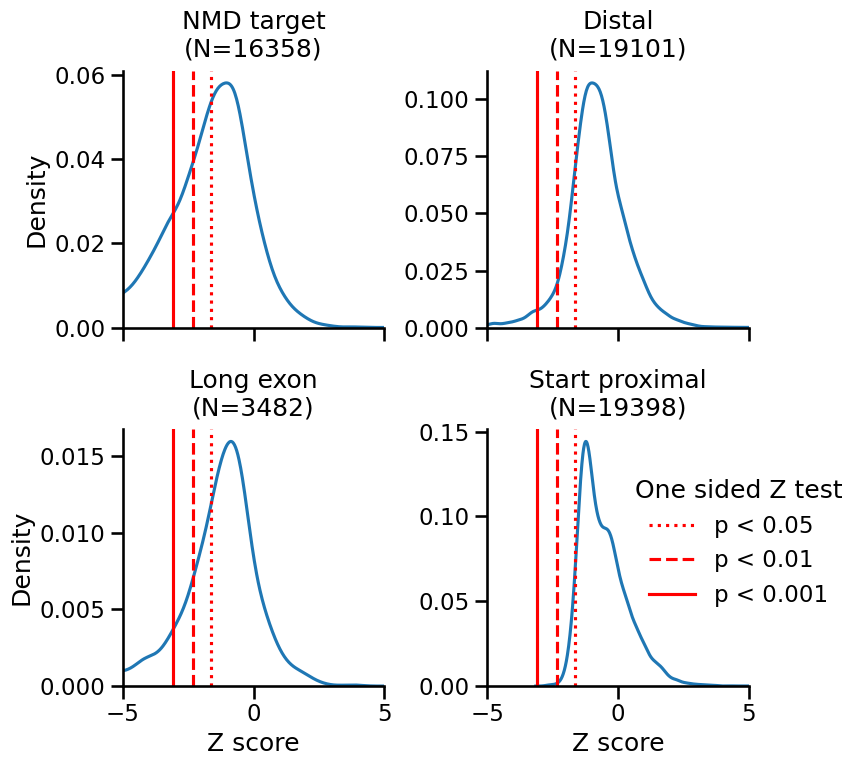

In [6]:
sns.set_context("talk")

regions = ["nmd_target", "distal_nmd", "long_exon", "start_proximal"]
regions_title = ["NMD target", "Distal", "Long exon", "Start proximal"]
count = [
    df.loc[(df.region == r) & (df.csq == "nonsense"), "z"].count() for r in regions
]

g = sns.displot(
    kind="kde",
    height=4,
    data=df[df.csq == "nonsense"],
    x="z",
    col="region",
    col_order=regions,
    col_wrap=2,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="Z score",
    xlim=(-5, 5),
)

for ax, r, n in zip(list(g.axes), [r for r in regions_title], count):
    ax.set_title(f"{r}\n(N={n})", pad=10,)
    ax.axvline(x=norm.isf(0.95), color="r", linestyle=":", label="p < 0.05")
    ax.axvline(x=norm.isf(0.99), color="r", linestyle="--", label="p < 0.01")
    ax.axvline(x=norm.isf(0.999), color="r", linestyle="-", label="p < 0.001")

h, l = ax.get_legend_handles_labels()
legend = g.figure.legend(
    h, l,
    title="One sided Z test",
    loc="center right",
    bbox_to_anchor=(1.1, 0.3),
    frameon=False,
)

plt.tight_layout()
plt.savefig("../plots/constraint_z_in_regions_nonsense.svg", format="svg", bbox_extra_artists=(legend,), bbox_inches="tight")